<a href="https://colab.research.google.com/github/MUKESHRAJMAHENDRAN/Time_series_with_fbprophet/blob/main/Cryptoprice_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Top 5 Cryptocurrency price prediction for next 8 days(13-07-2022 to 20-7-2022)

**About the dataset**

Datasets for this project is taken from historical data of last 2 years(13-02-2020 to 13-07-2022), from an source: https://finance.yahoo.com/cryptocurrencies/

**Project description:**

I was asked to predict the price of top 5 crypto currency price for next one week. And prepare the documentation and presentation for the same

**Diving into the problems**

*According to the cryptocurrency market cap as of now the top 5 cryptocurrency are:*

1. Bitcoin (BTC) 
2. Ethereum (ETH) 
3. Tether (USDT) 
4. USD Coin (USDC) 
5. Binance Coin (BNB)

##1. Bitcoin

In [1]:
#Importing the necessary libraries for understanding the dataset and explorations.
import pandas as pd
import numpy as np
from fbprophet import Prophet

###Exploratory data analysis

In [2]:
#loading the dataframes and parse the date column to convert the object to data datatypes
#loading the Date column and Close colum(Which is end of the price prediction of the bitcoin)
df = pd.read_csv("/content/drive/MyDrive/Coin Fantasy/BTC-USD.csv", parse_dates=["Date"], usecols = ["Date", "Close"])
df.head()

,Date,Close
0,2020-07-13,9243.614258
1,2020-07-14,9243.213867
2,2020-07-15,9192.836914
3,2020-07-16,9132.227539
4,2020-07-17,9151.392578


In [3]:
df.tail()

,Date,Close
726,2022-07-09,21592.207031
727,2022-07-10,20860.449219
728,2022-07-11,19970.556641
729,2022-07-12,19323.914063
730,2022-07-13,19466.919922


In [4]:
#checking for an non null value
df.isna().sum()

Date     0
Close    0
dtype: int64

In [5]:
#getting the information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    731 non-null    datetime64[ns]
 1   Close   731 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.5 KB


###Model Building

I will be using the fbprophet timeseries model for the given datasets.

In [6]:
#for fb prophet to work properly column of the data frame in the format ds and y so we are converting it.
df.columns = ["ds", "y"]

In [7]:
#fitting a model into dataframe
model = Prophet()
model.fit(df);

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [8]:
#I will use period to 8 days because that much day only I am going to predict.
future = model.make_future_dataframe(periods=8)

In [9]:
future.tail(7)

,ds
732,2022-07-15
733,2022-07-16
734,2022-07-17
735,2022-07-18
736,2022-07-19
737,2022-07-20
738,2022-07-21


In [10]:
#yhat is the value we are going to predict and yhat_lower and yhat_upper the min and maximum distance of the prediction.
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
729,2022-07-12,20262.559213,17059.655206,23808.767284
730,2022-07-13,20587.129025,17128.466028,24073.445782
731,2022-07-14,20665.390257,17278.634628,23974.264614
732,2022-07-15,20931.461591,17554.100330,24263.744575
733,2022-07-16,21252.992597,17899.662467,24739.124308
734,2022-07-17,21567.761601,18195.828547,24797.748790
735,2022-07-18,21892.035285,18460.560373,25290.643359
736,2022-07-19,22182.225128,18762.143997,25586.603721
737,2022-07-20,22631.961069,19019.950497,25673.403263
738,2022-07-21,22825.388409,19323.602532,26054.753240


In [11]:
bitcoin = forecast[["ds", "yhat"]]
bitcoin.tail(8)

,ds,yhat
731,2022-07-14,20665.390257
732,2022-07-15,20931.461591
733,2022-07-16,21252.992597
734,2022-07-17,21567.761601
735,2022-07-18,21892.035285
736,2022-07-19,22182.225128
737,2022-07-20,22631.961069
738,2022-07-21,22825.388409


###Plotting

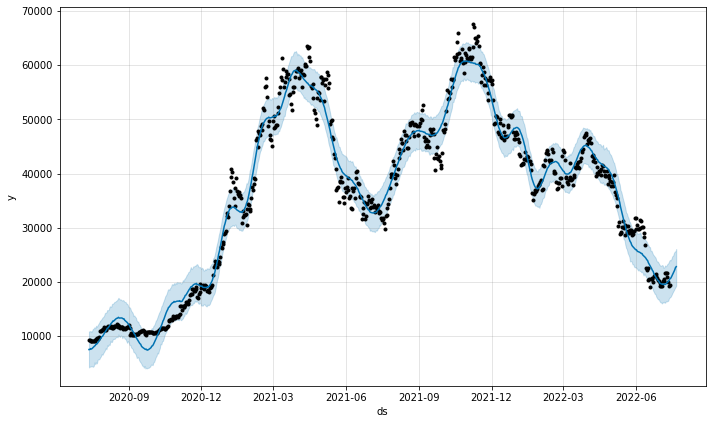

In [12]:
#Let's visualize and see how our model is predicting
fig1 = model.plot(forecast)

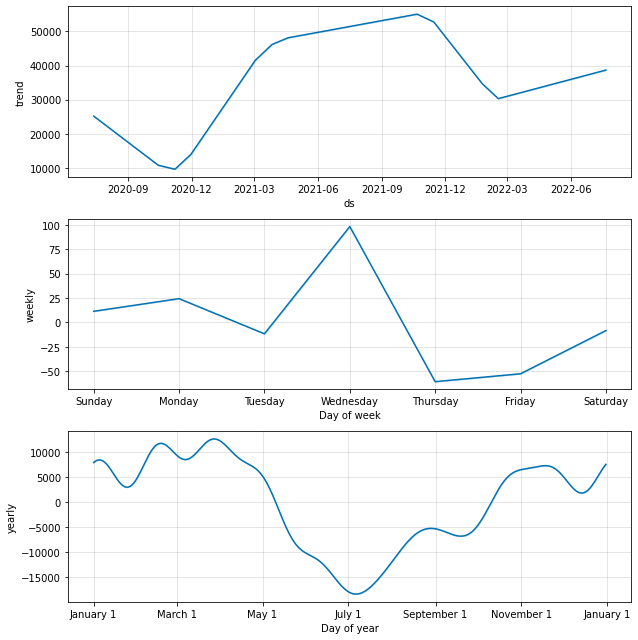

In [13]:
#Let's look into the plot and understand what it's actually saying
fig2 = model.plot_components(forecast)

###Observation

From the fig1 our model our model performing good by properly fitting the dataset.

from fig2 trend digram shows that price of the bitcoin is increased in early 2021 and lowered at the beggining of the 2022 and started increasing now

During an week wednesday price reaching the maximum

June,July, August is the month trend goes lower, July is the time period in an year it goes lower price(Fun fact: And i am doing this project in july).

##2. Ethereum

###Exploratory data analysis

In [14]:
#loading the dataframes and parse the date column to convert the object to data datatypes
#loading the Date column and Close colum(Which is end of the price prediction of the bitcoin)
df = pd.read_csv("/content/drive/MyDrive/Coin Fantasy/ETH-USD.csv", parse_dates=["Date"], usecols = ["Date", "Close"])
df.head()

,Date,Close
0,2020-07-13,239.604584
1,2020-07-14,240.211487
2,2020-07-15,238.423523
3,2020-07-16,233.640884
4,2020-07-17,232.773087


In [15]:
df.tail()

,Date,Close
726,2022-07-09,1216.978271
727,2022-07-10,1168.401611
728,2022-07-11,1097.236572
729,2022-07-12,1038.191650
730,2022-07-13,1051.746338


In [16]:
#checking for an non null value
df.isna().sum()

Date     0
Close    0
dtype: int64

In [17]:
#getting the information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    731 non-null    datetime64[ns]
 1   Close   731 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.5 KB


###Model Building

In [18]:
#for fb prophet to work properly column of the data frame in the format ds and y so we are converting it.
df.columns = ["ds", "y"]

In [19]:
#fitting a model into dataframe
model = Prophet()
model.fit(df);

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [20]:
#I will use period to 8 days because that much day only I am going to predict.
future = model.make_future_dataframe(periods=8)

In [21]:
future.tail(7)

,ds
732,2022-07-15
733,2022-07-16
734,2022-07-17
735,2022-07-18
736,2022-07-19
737,2022-07-20
738,2022-07-21


In [22]:
#yhat is the value we are going to predict and yhat_lower and yhat_upper the min and maximum distance of the prediction.
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
729,2022-07-12,712.564597,346.338814,1065.211642
730,2022-07-13,707.514246,341.318804,1045.677316
731,2022-07-14,675.086013,336.043130,1042.434971
732,2022-07-15,651.206788,298.171755,991.615084
733,2022-07-16,646.051710,313.213586,1011.014661
734,2022-07-17,643.605683,267.367172,989.457736
735,2022-07-18,634.362011,296.995924,995.114015
736,2022-07-19,631.133245,302.278327,1016.825999
737,2022-07-20,634.354320,311.239849,1000.570636
738,2022-07-21,610.569699,262.187245,958.133187


In [23]:
Ethereum = forecast[["ds", "yhat"]]
Ethereum.tail(8)

,ds,yhat
731,2022-07-14,675.086013
732,2022-07-15,651.206788
733,2022-07-16,646.051710
734,2022-07-17,643.605683
735,2022-07-18,634.362011
736,2022-07-19,631.133245
737,2022-07-20,634.354320
738,2022-07-21,610.569699


###Plotting

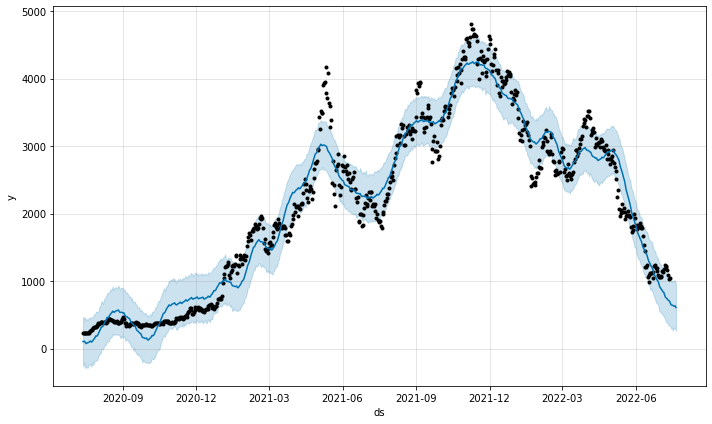

In [24]:
#Let's visualize and see how our model is predicting
fig1 = model.plot(forecast)

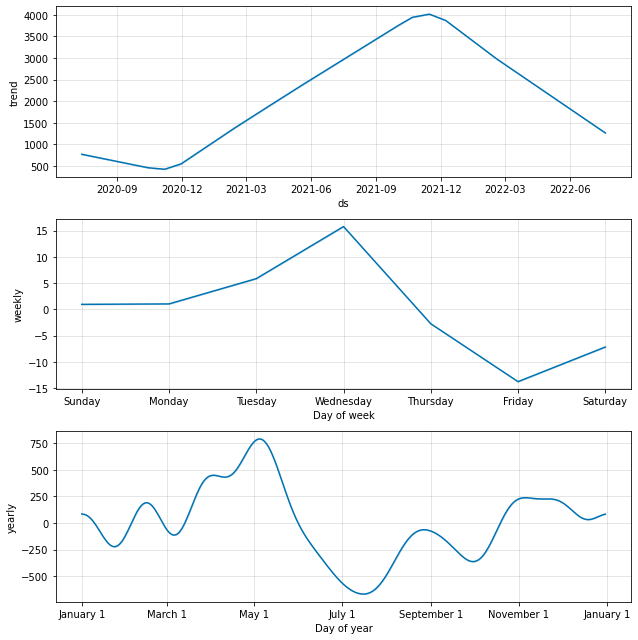

In [25]:
#Let's look into the plot and understand what it's actually saying
fig2 = model.plot_components(forecast)

###Observations

1. Like Bitcoin-price is high in wednesday and low in the month of july.
2. Values are fluctuating through out the year
3. In general the price is going downward trend

##Tether

###Exploratory data analysis

In [26]:
#loading the dataframes and parse the date column to convert the object to data datatypes
#loading the Date column and Close colum(Which is end of the price prediction of the bitcoin)
df = pd.read_csv("/content/drive/MyDrive/Coin Fantasy/USDT-USD.csv", parse_dates=["Date"], usecols = ["Date", "Close"])
df.head()

,Date,Close
0,2020-07-13,0.999552
1,2020-07-14,0.999046
2,2020-07-15,0.999444
3,2020-07-16,0.999980
4,2020-07-17,0.999616


In [27]:
df.tail()

,Date,Close
726,2022-07-09,0.999538
727,2022-07-10,0.999465
728,2022-07-11,0.999225
729,2022-07-12,0.999343
730,2022-07-13,0.999218


In [28]:
#checking for an non null value
df.isna().sum()

Date     0
Close    0
dtype: int64

In [29]:
#getting the information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    731 non-null    datetime64[ns]
 1   Close   731 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.5 KB


###Model building

In [30]:
#for fb prophet to work properly column of the data frame in the format ds and y so we are converting it.
df.columns = ["ds", "y"]

In [31]:
#fitting a model into dataframe
model = Prophet()
model.fit(df);

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [32]:
#I will use period to 8 days because that much day only I am going to predict.
future = model.make_future_dataframe(periods=8)

In [33]:
#yhat is the value we are going to predict and yhat_lower and yhat_upper the min and maximum distance of the prediction.
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
729,2022-07-12,0.999179,0.997729,1.000642
730,2022-07-13,0.999265,0.997911,1.000539
731,2022-07-14,0.999234,0.997753,1.000708
732,2022-07-15,0.999158,0.997751,1.000593
733,2022-07-16,0.999153,0.997727,1.000571
734,2022-07-17,0.999084,0.997620,1.000554
735,2022-07-18,0.998995,0.997610,1.000486
736,2022-07-19,0.999127,0.997702,1.000509
737,2022-07-20,0.999249,0.997789,1.000784
738,2022-07-21,0.999263,0.997785,1.000635


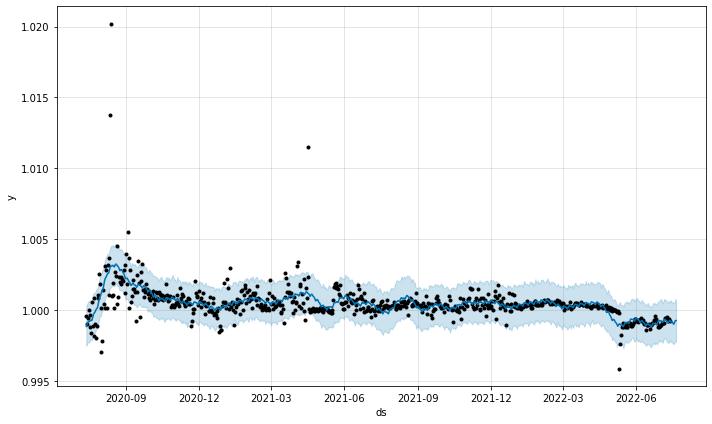

In [34]:
#Let's visualize and see how our model is predicting
fig1 = model.plot(forecast)

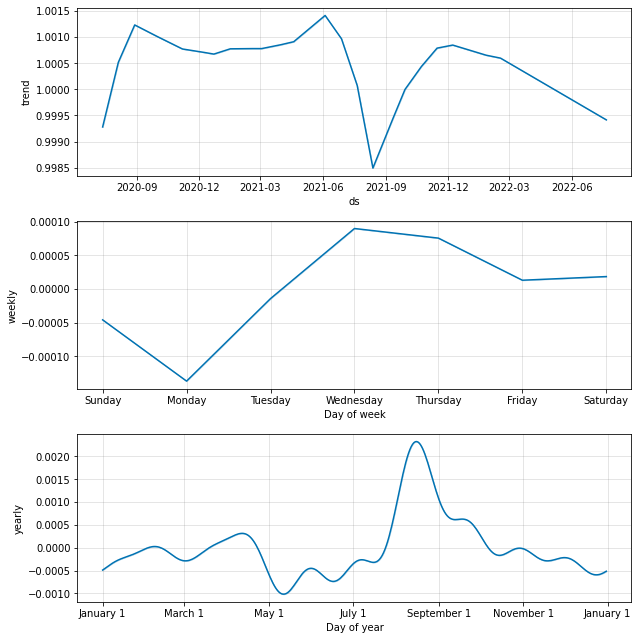

In [35]:
#Let's look into the plot and understand what it's actually saying
fig2 = model.plot_components(forecast)

In [36]:
Tether = forecast[["ds", "yhat"]]
Tether.tail(8)

,ds,yhat
731,2022-07-14,0.999234
732,2022-07-15,0.999158
733,2022-07-16,0.999153
734,2022-07-17,0.999084
735,2022-07-18,0.998995
736,2022-07-19,0.999127
737,2022-07-20,0.999249
738,2022-07-21,0.999263


###Observations

1. Interstingly the value are going down on Monday, others like Bitcoin and Ethereum going down at the end of the week.
2. And the price is picking up in july and peak in august and the graph is decreasing Trend.

##USD Coin

###Exploratory data analysis

In [37]:
#loading the dataframes and parse the date column to convert the object to data datatypes
#loading the Date column and Close colum(Which is end of the price prediction of the bitcoin)
df = pd.read_csv("/content/drive/MyDrive/Coin Fantasy/USDC-USD.csv", parse_dates=["Date"], usecols = ["Date", "Close"])
df.head()

,Date,Close
0,2020-07-13,1.002431
1,2020-07-14,0.998808
2,2020-07-15,0.999521
3,2020-07-16,0.999943
4,2020-07-17,0.999219


In [38]:
df.tail()

,Date,Close
726,2022-07-09,1.000046
727,2022-07-10,1.000029
728,2022-07-11,1.000169
729,2022-07-12,0.999853
730,2022-07-13,1.000107


In [39]:
#checking for an non null value
df.isna().sum()

Date     0
Close    0
dtype: int64

In [40]:
#getting the information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    731 non-null    datetime64[ns]
 1   Close   731 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.5 KB


###Model building

In [41]:
#for fb prophet to work properly column of the data frame in the format ds and y so we are converting it.
df.columns = ["ds", "y"]

In [42]:
#fitting a model into dataframe
model = Prophet()
model.fit(df);

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [43]:
#I will use period to 8 days because that much day only I am going to predict.
future = model.make_future_dataframe(periods=8)

In [44]:
#yhat is the value we are going to predict and yhat_lower and yhat_upper the min and maximum distance of the prediction.
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
729,2022-07-12,0.999792,0.998837,1.000685
730,2022-07-13,0.999736,0.998812,1.000637
731,2022-07-14,0.999701,0.998767,1.000673
732,2022-07-15,0.999786,0.998791,1.000775
733,2022-07-16,0.999821,0.998894,1.000725
734,2022-07-17,0.999631,0.998722,1.000620
735,2022-07-18,0.999676,0.998685,1.000666
736,2022-07-19,0.999723,0.998782,1.000633
737,2022-07-20,0.999703,0.998767,1.000757
738,2022-07-21,0.999705,0.998715,1.000668


In [45]:
usd_coin = forecast[["ds", "yhat"]]
usd_coin.tail(8)

,ds,yhat
731,2022-07-14,0.999701
732,2022-07-15,0.999786
733,2022-07-16,0.999821
734,2022-07-17,0.999631
735,2022-07-18,0.999676
736,2022-07-19,0.999723
737,2022-07-20,0.999703
738,2022-07-21,0.999705


###Plotting

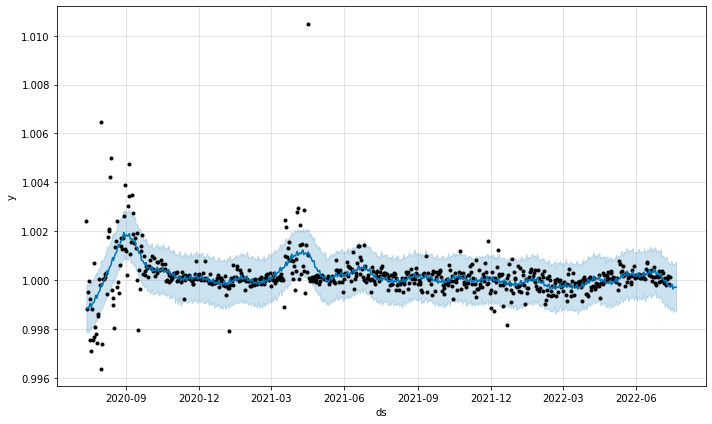

In [46]:
#Let's visualize and see how our model is predicting
fig1 = model.plot(forecast)

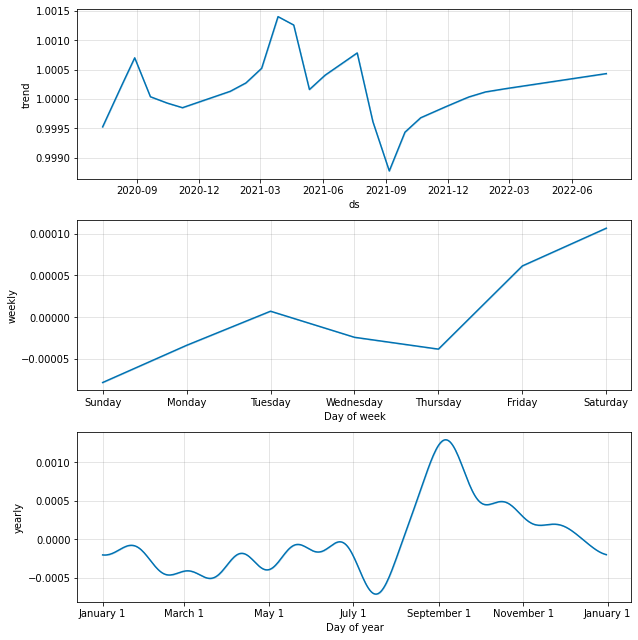

In [47]:
#Let's look into the plot and understand what it's actually saying
fig2 = model.plot_components(forecast)

###Observations

1. Price is in increasing trend.
2. Value is increasing in thursday and the monthly monthly trends are similiar to Tether

##Binance Coin 

###Exploratory data analysis

In [48]:
#loading the dataframes and parse the date column to convert the object to data datatypes
#loading the Date column and Close colum(Which is end of the price prediction of the bitcoin)
df = pd.read_csv("/content/drive/MyDrive/Coin Fantasy/BNB-USD.csv", parse_dates=["Date"], usecols = ["Date", "Close"])
df.head()

,Date,Close
0,2020-07-13,18.409563
1,2020-07-14,18.082909
2,2020-07-15,17.591215
3,2020-07-16,17.143843
4,2020-07-17,17.084974


In [49]:
df.tail()

,Date,Close
726,2022-07-09,243.241074
727,2022-07-10,234.655579
728,2022-07-11,225.858505
729,2022-07-12,220.464554
730,2022-07-13,222.930771


In [50]:
#checking for an non null value
df.isna().sum()

Date     0
Close    0
dtype: int64

In [51]:
#getting the information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    731 non-null    datetime64[ns]
 1   Close   731 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.5 KB


###Model building

In [52]:
#for fb prophet to work properly column of the data frame in the format ds and y so we are converting it.
df.columns = ["ds", "y"]

In [53]:
#fitting a model into dataframe
model = Prophet()
model.fit(df);

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [54]:
#I will use period to 8 days because that much day only I am going to predict.
future = model.make_future_dataframe(periods=8)

In [55]:
#yhat is the value we are going to predict and yhat_lower and yhat_upper the min and maximum distance of the prediction.
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
729,2022-07-12,185.111144,133.270914,234.979202
730,2022-07-13,185.172814,134.259076,235.505724
731,2022-07-14,183.999280,130.936374,236.017561
732,2022-07-15,184.220786,135.549971,235.481146
733,2022-07-16,183.552039,131.457796,231.445370
734,2022-07-17,184.047203,132.755946,231.645877
735,2022-07-18,182.994193,129.054363,234.553307
736,2022-07-19,183.522040,130.523018,233.409085
737,2022-07-20,182.846142,133.053658,230.586375
738,2022-07-21,180.899740,129.215977,233.384561


###Plotting

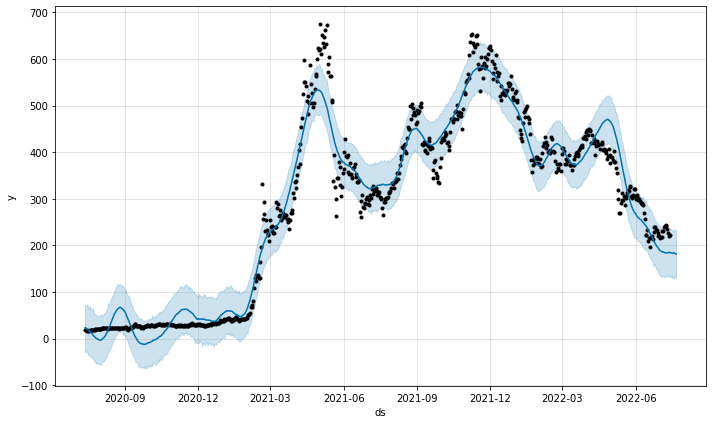

In [56]:
#Let's visualize and see how our model is predicting
fig1 = model.plot(forecast)

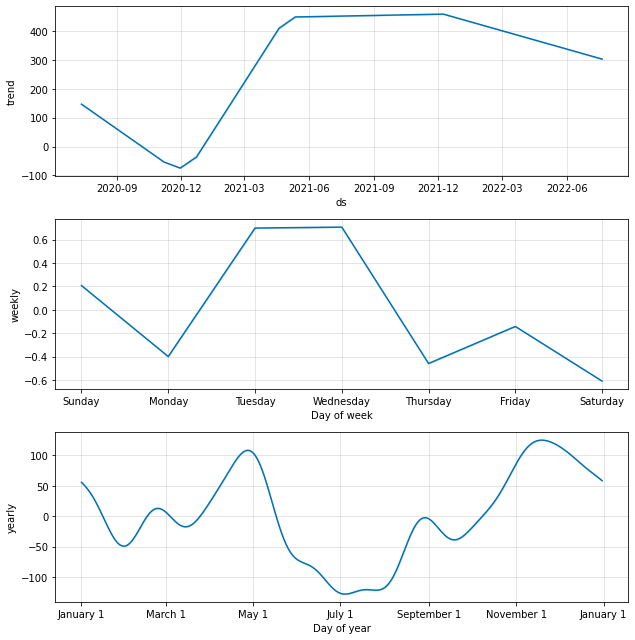

In [57]:
#Let's look into the plot and understand what it's actually saying
fig2 = model.plot_components(forecast)

In [58]:
binance = forecast[["ds", "yhat"]]
binance.tail(8)

,ds,yhat
731,2022-07-14,183.999280
732,2022-07-15,184.220786
733,2022-07-16,183.552039
734,2022-07-17,184.047203
735,2022-07-18,182.994193
736,2022-07-19,183.522040
737,2022-07-20,182.846142
738,2022-07-21,180.899740


###Observations

1. Trends is healty but decreasing and not as largescale price drop
2. Price fluctuation is high through out the year but drops in the month of July

##Merge and compare the datadrame for better understanding

In [59]:
#Changing the data frames into understable column name
bitcoin.columns = ["date", "bitcoin_price"]
Ethereum.columns = ["date", "ethereum_price"]
Tether.columns = ["date", "Tether_price"]
usd_coin.columns = ["date", "usd_coin_price"]
binance.columns = ["date", "binance_price"]

In [60]:
#Merging five dataframes
frames= [bitcoin, Ethereum, Tether, usd_coin, binance]
from functools import reduce
crypto_price = reduce(lambda x,y: pd.merge(x,y, on='date', how='outer'), frames)
Top_five_cryptocurrency = crypto_price.set_index("date")
Top_five_cryptocurrency.tail(8)

,bitcoin_price,ethereum_price,Tether_price,usd_coin_price,binance_price
date,,,,,
2022-07-14,20665.390257,675.086013,0.999234,0.999701,183.999280
2022-07-15,20931.461591,651.206788,0.999158,0.999786,184.220786
2022-07-16,21252.992597,646.051710,0.999153,0.999821,183.552039
2022-07-17,21567.761601,643.605683,0.999084,0.999631,184.047203
2022-07-18,21892.035285,634.362011,0.998995,0.999676,182.994193
2022-07-19,22182.225128,631.133245,0.999127,0.999723,183.522040
2022-07-20,22631.961069,634.354320,0.999249,0.999703,182.846142
2022-07-21,22825.388409,610.569699,0.999263,0.999705,180.899740


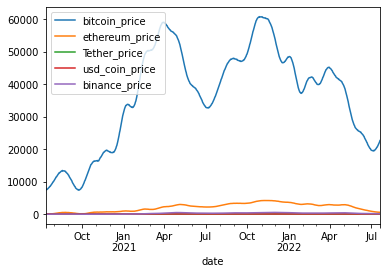

In [61]:
#Overall price
Top_five_cryptocurrency.plot();

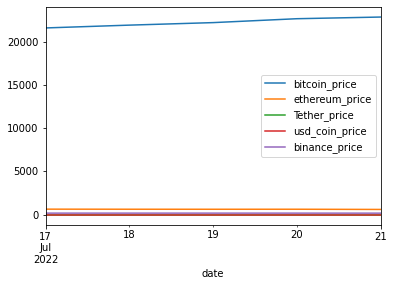

In [62]:
#Pric for next 8 days
Top_five_cryptocurrency.tail().plot();

#Conclusion

Factors May responsible for price reduction of cryptocurrency:

1. War in the Ukraine
2. Global pandemic
3. Market Competition